In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

In [4]:
df=pd.read_csv('data_evaluation_input.csv')

In [5]:
df 

,Unnamed: 0,accommodation_id,longitude,latitude,driving_duration,walking_duration,transit_duration,image_id,image,tag_name,probability,accommodation_name,dt,distance_to_bigben,description,score,response_time
0,0,1504047,-0.12759,51.52702,13,33,19,DX64WCVN23LSWFWPBOWT5YGBMO45N3SF3HBQLCFHXQUJCV...,https://imgcy.trivago.com/partner-images/1d/fd...,building,0.9999,Studios 2 Let Serviced Apartments,2024-03-07,1.998302,NaN,0.750398,0.124018
1,1,10405908,-0.12750,51.50722,4,14,14,RB77EISJ5MQDUEGFZSGFH3EGQQNEDPHANSIYFNAFJJKIN6...,https://imgcy.trivago.com/partner-images/88/7f...,building,1.0000,Lovely Family Apartments For Upto 6 Near Oxfor...,2024-03-07,0.820251,NaN,0.413374,0.468961
2,2,18426,-0.18294,51.49556,21,77,17,SWPQ2FXDSA2PH4KDMR56KNBPFJZ5C77DBKGBBAA4BPG5CG...,https://imgcy.trivago.com/partner-images/95/9f...,building,1.0000,Meliá London Kensington Meliá Collection,2024-03-07,4.866410,NaN,0.632710,0.451684
3,3,22032936,-0.12750,51.50722,4,14,11,3DL2RXNO4NVWZFBC4L2YATHITDKB2DDWBF5LQ6JLO2C6GM...,https://imgcy.trivago.com/partner-images/d8/d7...,building,1.0000,Victorian Conversion Garden Flat,2024-03-07,0.820251,NaN,0.579433,0.213040
4,4,20648498,-0.12750,51.50722,4,14,9,4MLPB64JFHPSIM2YTAFY4U5HCCVUIUABRH7GUVMVTJZKKO...,https://imgcy.trivago.com/partner-images/e3/16...,building,1.0000,Stunning Central Richmond With Garden,2024-03-07,0.820251,NaN,0.650984,0.381180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,911,46832,-0.10219,51.50610,9,23,16,3ERUOOVFDLAGJLMBZHU22QRWRFUPS4ZQT36ZWD5XMIAHSX...,https://imgcy.trivago.com/partner-images/d9/23...,building,0.9999,Holiday Inn Express London - Southwark,2024-03-07,1.114754,Palace Of Westminster,0.376706,0.361036
912,912,46539,-0.07737,51.51093,9,40,14,HHWELDHJZU6GDBQT64L4BQMRMQFN24R4VHKAV4NLWPXD6T...,https://imgcy.trivago.com/partner-images/39/ec...,building,0.9999,Bridgestreet Pepys Street,2024-03-07,2.727606,Palace Of Westminster,0.465586,0.290676
913,913,46461,-0.13245,51.50752,10,19,11,YOCE5VDTKT3X6YCMRVWEMD36FJL2MK3AVYRMUZSBB46FFL...,https://imgcy.trivago.com/partner-images/c3/84...,building,0.9972,Sofitel London St James,2024-03-07,1.129889,Palace Of Westminster,0.708477,0.402796
914,914,8003044,-0.09626,51.51041,5,21,14,GXVVATZDDOWNRD5CN7CUVAE7XGOJ3JNLY5H64EMT2RX7TA...,https://imgcy.trivago.com/partner-images/35/eb...,building,0.9999,Superior 2 Bedroom 2 Bath Apartment St Pauls L...,2024-03-07,1.419610,Palace Of Westminster,0.671675,0.462791


In [8]:
filtered_df = df[df['description'].notna()] 
filtered_df

,Unnamed: 0,accommodation_id,longitude,latitude,driving_duration,walking_duration,transit_duration,image_id,image,tag_name,probability,accommodation_name,dt,distance_to_bigben,description,score,response_time
358,358,37117240,-0.12156,51.51292,6,8,8,LQZAJCT4ZPKEFCEVQEIUXVAFFRK3Y7VCZD47KBCA7GDJQO...,https://imgcy.trivago.com/partner-images/5c/32...,building,0.9999,Stunning 3-bedroom Apartment Combines Modern L...,2024-03-07,0.436994,Big Ben,0.726520,0.233737
359,359,37002286,-0.11198,51.49616,10,29,14,AQXHERFWCCE7ZMYPPCQ5DK55ZQA7E7LLRAVJF4ERSOOFVD...,https://imgcy.trivago.com/partner-images/04/2e...,building,1.0000,"Guestready - Stylish Skyline Views, Central Lo...",2024-03-07,1.613119,Big Ben,0.811984,0.160189
360,360,36840476,-0.11609,51.48661,15,47,20,4VSXJCCLACXZIB2WWGFTAS2WHJD7UJOTIXH4NPRAA3OOR3...,https://imgcy.trivago.com/partner-images/e5/65...,building,0.9999,"New Central 1br Wstunning View, 5 Min Vauxhall St",2024-03-07,2.640973,Big Ben,0.921683,0.143448
361,361,36834002,-0.09608,51.48916,16,47,17,FEG2Z6GPDJ5X3PICU4J23QRAL3HQV6IGPKNTWSLHCZTU53...,https://imgcy.trivago.com/partner-images/29/0d...,building,0.9999,Stunning 1 Bedroom Central London Apartment Zo...,2024-03-07,2.758115,Big Ben,0.937068,0.161804
362,362,36834002,-0.09608,51.48916,16,47,17,K75YND452KJSTYPOGKE373GD5DTLVDPMBRVEPQYDPTPGY3...,https://imgcy.trivago.com/partner-images/57/fb...,swimming-pool,0.9633,Stunning 1 Bedroom Central London Apartment Zo...,2024-03-07,2.758115,Big Ben,0.630903,0.121960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,911,46832,-0.10219,51.50610,9,23,16,3ERUOOVFDLAGJLMBZHU22QRWRFUPS4ZQT36ZWD5XMIAHSX...,https://imgcy.trivago.com/partner-images/d9/23...,building,0.9999,Holiday Inn Express London - Southwark,2024-03-07,1.114754,Palace Of Westminster,0.376706,0.361036
912,912,46539,-0.07737,51.51093,9,40,14,HHWELDHJZU6GDBQT64L4BQMRMQFN24R4VHKAV4NLWPXD6T...,https://imgcy.trivago.com/partner-images/39/ec...,building,0.9999,Bridgestreet Pepys Street,2024-03-07,2.727606,Palace Of Westminster,0.465586,0.290676
913,913,46461,-0.13245,51.50752,10,19,11,YOCE5VDTKT3X6YCMRVWEMD36FJL2MK3AVYRMUZSBB46FFL...,https://imgcy.trivago.com/partner-images/c3/84...,building,0.9972,Sofitel London St James,2024-03-07,1.129889,Palace Of Westminster,0.708477,0.402796
914,914,8003044,-0.09626,51.51041,5,21,14,GXVVATZDDOWNRD5CN7CUVAE7XGOJ3JNLY5H64EMT2RX7TA...,https://imgcy.trivago.com/partner-images/35/eb...,building,0.9999,Superior 2 Bedroom 2 Bath Apartment St Pauls L...,2024-03-07,1.419610,Palace Of Westminster,0.671675,0.462791


In [9]:
unique_ids = filtered_df['accommodation_id'].unique()

In [12]:
unique_ids

array([37117240, 37002286, 36840476, 36834002, 33865262, 33865248,
       33792986, 33691474, 30278260, 30226106, 29683768, 29585282,
       15728896, 15539868, 24823066, 24772306, 24736782, 36482352,
       36470002, 36462122,  5404544, 23993806, 23793898, 23735558,
       23689720, 23604032, 23551140, 12468688, 11647476, 29321990,
       29033564, 28880778, 36213578, 35874684, 35822862, 32815084,
       32373174, 23272618, 22669818, 22111196, 22054668, 22001372,
       28640342, 28518430, 28503346, 28264338,  1321090,  1160364,
       35426726, 35359108, 20801942, 20651418, 27590462, 27116136,
       35200870,    48150, 31271040, 30933388, 30628994, 17855242,
       17848136, 17843114, 34483958, 34312250,    47688,    46850,
          46832,    12763,    12641, 30440764, 34166254, 34135088,
       34097884, 26817906, 26669782, 25614932, 25409530, 25305100,
       25279996, 37029172, 24770750, 24549232, 23716258,  2398847,
        1563001, 21744478, 21535296, 31528272, 18906574, 27308

In [13]:
unique_id_count = filtered_df['accommodation_id'].nunique()

In [14]:
print(unique_id_count)

339


In [38]:
df_1=pd.read_csv('accommodation_review_rating.csv')
df_1['review_rating'] = df_1['review_rating'].fillna(0)

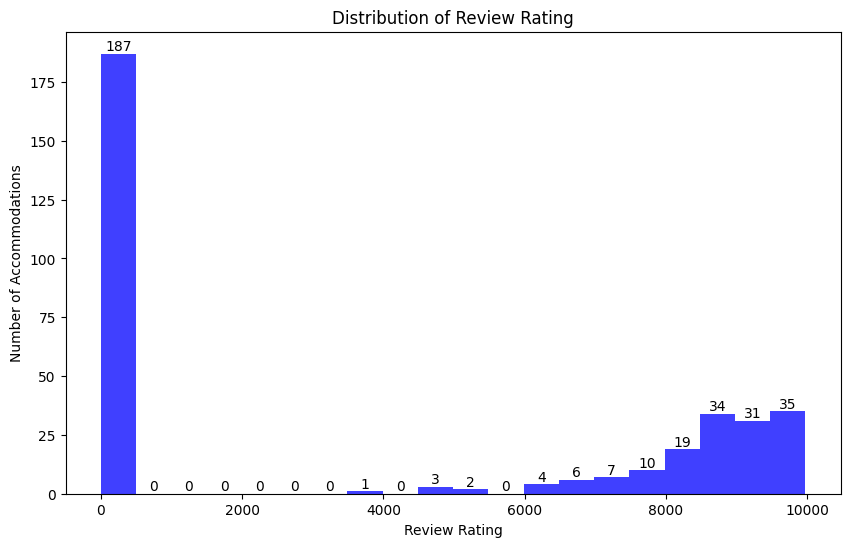

In [40]:
counts, bin_edges = np.histogram(df_1['review_rating'], bins=20)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, counts, width=(bin_edges[1] - bin_edges[0]), alpha=0.75, color='blue')

# Add text labels above the bars
for x, y in zip(bin_centers, counts):
    plt.text(x, y, str(y), ha='center', va='bottom')  # ha and va denote horizontal and vertical alignment

# Set title and labels
plt.title('Distribution of Review Rating')
plt.xlabel('Review Rating')
plt.ylabel('Number of Accommodations')
plt.show()

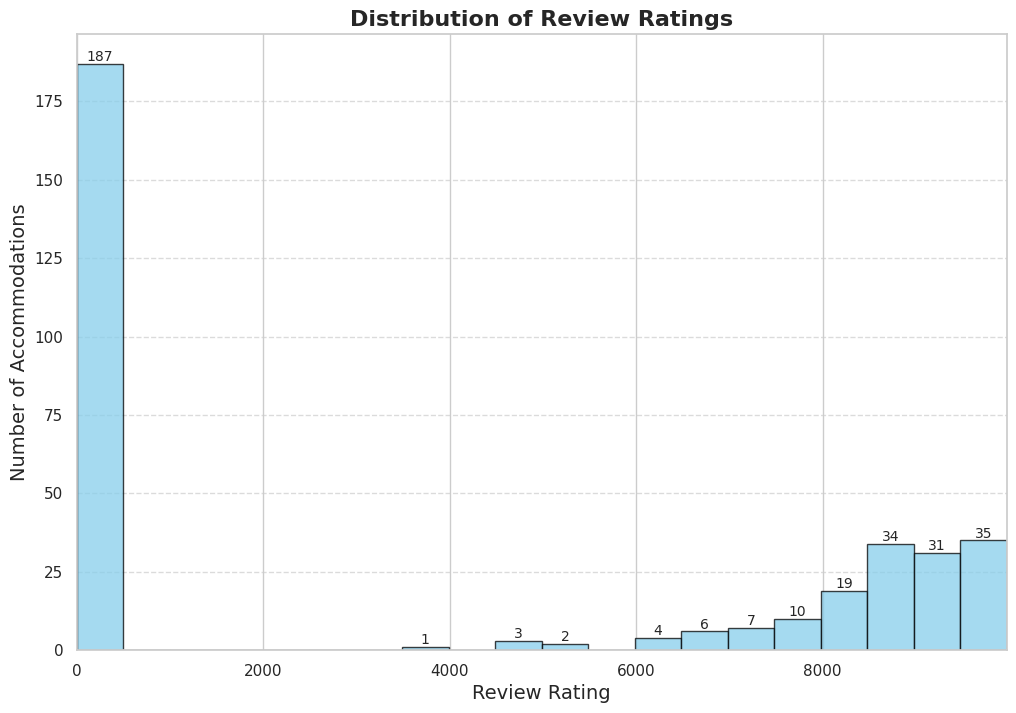

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the bins, ensuring that 0 is included
bins = np.linspace(df_1['review_rating'].min(), df_1['review_rating'].max(), 21)

# Generate the histogram data
counts, bin_edges = np.histogram(df_1['review_rating'], bins=bins)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Create the histogram
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
plt.bar(bin_centers, counts, width=(bin_edges[1] - bin_edges[0]), alpha=0.75, color='skyblue', edgecolor='black')

# Add text labels above the bars
for x, y in zip(bin_centers, counts):
    if y > 0:  # Only add text labels for non-zero counts
        plt.text(x, y, str(y), ha='center', va='bottom', fontsize=10)

# Set title and labels
plt.title('Distribution of Review Ratings', fontsize=16, fontweight='bold')
plt.xlabel('Review Rating', fontsize=14)
plt.ylabel('Number of Accommodations', fontsize=14)

# Set x-axis limits to include all bins
plt.xlim([bin_edges[0], bin_edges[-1]])

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()